In [283]:
from scipy.io import arff
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler    

## Data Import

In [284]:
data_train = arff.loadarff('KDDTrain+.arff')
data_test = arff.loadarff("KDDTest+.arff")

train_df = pd.DataFrame(data_train[0])
test_df = pd.DataFrame(data_test[0])
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'


## Preprocessing

## Data Analysis

In [285]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

There is no missing data to 

In [286]:
train_df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [287]:
train_df['class'].value_counts(sort=True)


b'normal'     67343
b'anomaly'    58630
Name: class, dtype: int64

In [288]:
train_df['protocol_type'].groupby(train_df['class']).value_counts(sort=True)

class       protocol_type
b'anomaly'  b'tcp'           49089
            b'icmp'           6982
            b'udp'            2559
b'normal'   b'tcp'           53600
            b'udp'           12434
            b'icmp'           1309
Name: protocol_type, dtype: int64

In [289]:
train_df['su_attempted'].groupby(train_df['class']).value_counts(sort=True)

class       su_attempted
b'anomaly'  0.0             58629
            1.0                 1
b'normal'   0.0             67264
            2.0                59
            1.0                20
Name: su_attempted, dtype: int64

In [290]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in train_df.columns:
    if train_df[col_name].dtypes == 'object' :
        unique_cat = len(train_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(train_df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'land' has 2 categories
Feature 'logged_in' has 2 categories
Feature 'is_host_login' has 2 categories
Feature 'is_guest_login' has 2 categories
Feature 'class' has 2 categories

Distribution of categories in service:
b'http'        40338
b'private'     21853
b'domain_u'     9043
b'smtp'         7313
b'ftp_data'     6860
Name: service, dtype: int64


In [291]:
# Test set
print('Test set:')
for col_name in test_df.columns:
    if test_df[col_name].dtypes == 'object' :
        unique_cat = len(test_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'land' has 2 categories
Feature 'logged_in' has 2 categories
Feature 'is_host_login' has 2 categories
Feature 'is_guest_login' has 2 categories
Feature 'class' has 2 categories


In [292]:
print(test_df.shape)
trainservice=train_df['service'].tolist()
testservice= test_df['service'].tolist()
difference=list(set(trainservice) - set(testservice))
# string = 'service_'
difference

print(test_df['service'])
# for col in difference:
#     print(test_df[col])
#     test_df[col] = 0

test_df.shape
# difference=[string + x for x in difference]
# difference

(22544, 42)
0         b'private'
1         b'private'
2        b'ftp_data'
3           b'eco_i'
4          b'telnet'
            ...     
22539        b'smtp'
22540        b'http'
22541        b'http'
22542    b'domain_u'
22543      b'sunrpc'
Name: service, Length: 22544, dtype: object


(22544, 42)

In [293]:
print(train_df.shape)
print(train_df['num_outbound_cmds'].value_counts())
print(train_df['is_host_login'].value_counts())
train_df.drop('num_outbound_cmds', axis=1, inplace=True)
train_df.drop('is_host_login', axis=1, inplace=True)

print(test_df.shape)
print(test_df['num_outbound_cmds'].value_counts())
print(test_df['is_host_login'].value_counts())
test_df.drop('num_outbound_cmds', axis=1, inplace=True)
test_df.drop('is_host_login', axis=1, inplace=True)

train_df['protocol_type'] = train_df['protocol_type'].astype('category')
train_df['service'] = train_df['service'].astype('category')
train_df['flag'] = train_df['flag'].astype('category')
cat_columns = train_df.select_dtypes(['category']).columns
train_df[cat_columns] = train_df[cat_columns].apply(lambda x: x.cat.codes)


test_df['protocol_type'] = test_df['protocol_type'].astype('category')
test_df['service'] = test_df['service'].astype('category')
test_df['flag'] = test_df['flag'].astype('category')
cat_columns = test_df.select_dtypes(['category']).columns
test_df[cat_columns] = test_df[cat_columns].apply(lambda x: x.cat.codes)

(125973, 42)
0.0    125973
Name: num_outbound_cmds, dtype: int64
b'0'    125972
b'1'         1
Name: is_host_login, dtype: int64
(22544, 42)
0.0    22544
Name: num_outbound_cmds, dtype: int64
b'0'    22533
b'1'       11
Name: is_host_login, dtype: int64


In [294]:
train_df.drop_duplicates(subset=None, keep='first', inplace=True)
train_df.shape

(125964, 40)

In [295]:
train_df.skew()

duration                        11.879797
protocol_type                    0.309871
service                          0.452501
flag                            -0.949531
src_bytes                      190.662535
dst_bytes                      290.042549
land                            70.962526
wrong_fragment                  11.457570
urgent                         149.909154
hot                             12.589428
num_failed_logins               53.762502
logged_in                        0.426316
num_compromised                250.098950
root_shell                      27.246433
su_attempted                    42.434073
num_root                       236.905262
num_file_creations              55.663351
num_shells                      59.590021
num_access_files                45.553333
is_guest_login                  10.155373
count                            1.514178
srv_count                        4.693995
serror_rate                      0.963090
srv_serror_rate                  0

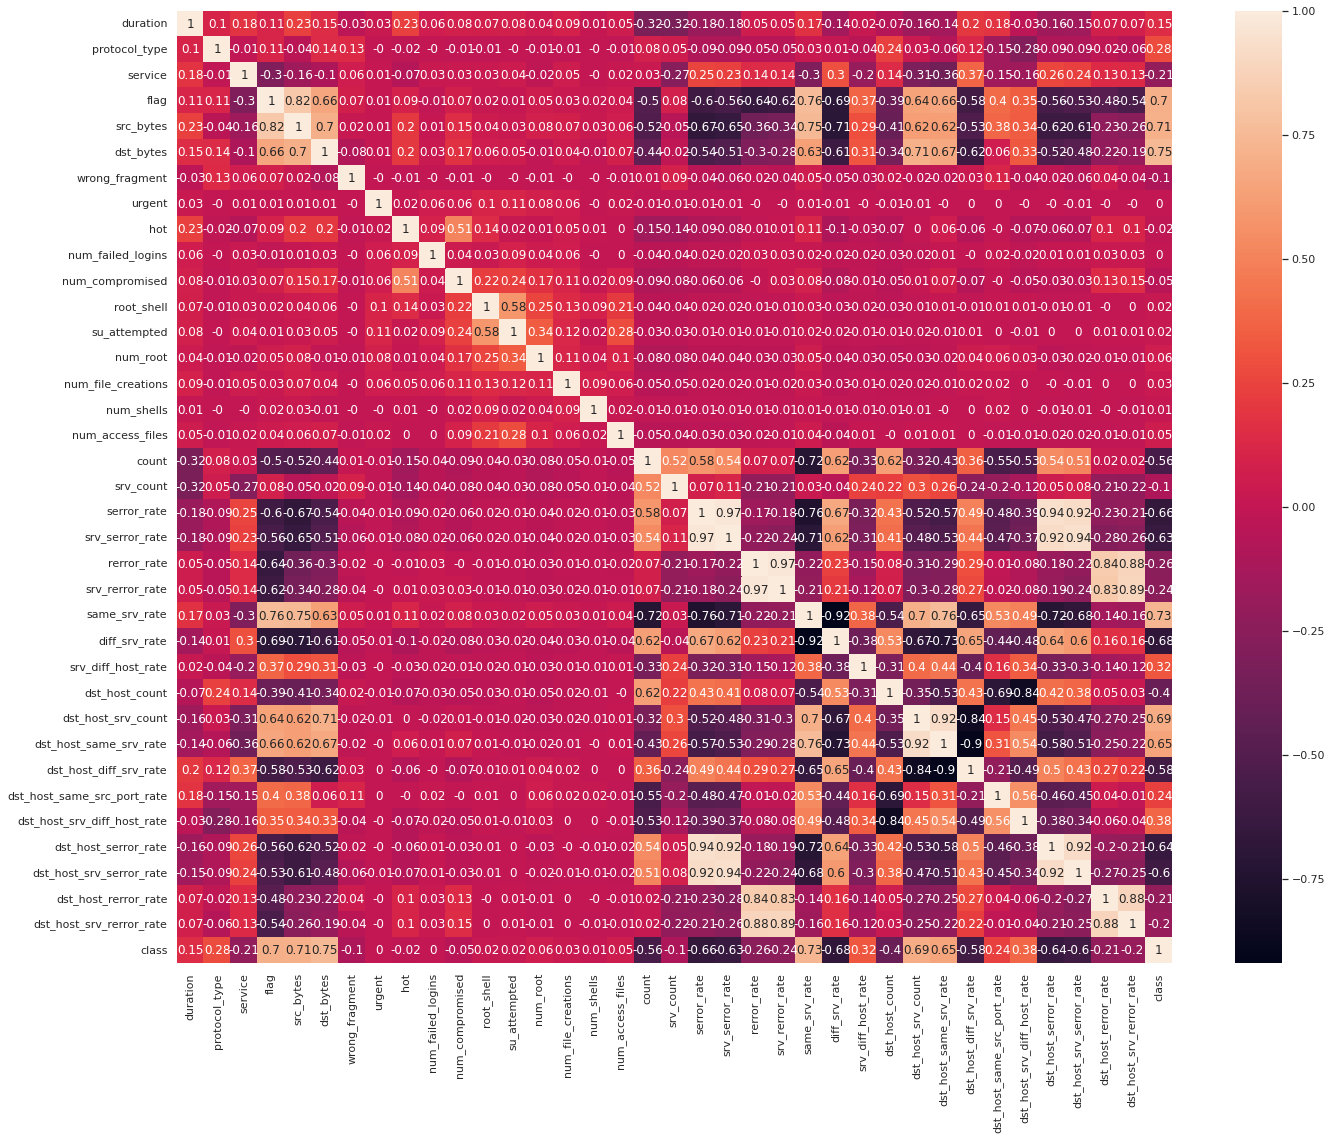

In [349]:
plt.figure(figsize=(20, 16))
sns.heatmap(train_df.corr(method='spearman').round(2), annot=True)
sns.set(rc={'figure.figsize':(100,60)})
plt.tight_layout()
plt.show()

In [337]:
#Preprocessing 
#Remove duplicates
# print(train_df.shape)
# print(test_df.shape)
# train_df = train_df.drop_duplicates()
# test_df = test_df.drop_duplicates()
# print(train_df.shape)
# print(test_df.shape)
train_df['class'] = train_df['class'].astype('category')
cat_columns = train_df.select_dtypes(['category']).columns
train_df[cat_columns] = train_df[cat_columns].apply(lambda x: x.cat.codes)
data = train_df.values
Y = data[:,39]
X = data[:,0:39]
X = np.transpose(X)
OHE = OneHotEncoder(categories='auto',
    handle_unknown='error', sparse=False)
le_y = LabelEncoder()
Y = le_y.fit_transform(Y).flatten()
Y = Y.reshape(-1, 1)
print(Y)
Y = OHE.fit_transform(Y)

test_df['class'] = test_df['class'].astype('category')
cat_columns = test_df.select_dtypes(['category']).columns
test_df[cat_columns] = test_df[cat_columns].apply(lambda x: x.cat.codes)
data_test = test_df.values
Y_test = data_test[:,39]
X_test = data_test[:,0:39]
X_test = np.transpose(X_test)
# OHE = OneHotEncoder(categorical_features=[0],
    # handle_unknown='error', n_values='auto', sparse=False)
le_y_test = LabelEncoder()
Y_test = le_y_test.fit_transform(Y_test).flatten()
Y_test = Y_test.reshape(-1, 1)
Y_test = OHE.fit_transform(Y_test)

st_scaler = StandardScaler()
X = st_scaler.fit_transform(X)
X_test = st_scaler.fit_transform(X_test)
print(Y[0])
print(Y_test[0])


# Get output (Normal/Anomaly class)
y = train_df.iloc[:, [39]].values
# Encode string values into binary
oe = OrdinalEncoder()
y_train = oe.fit_transform(y).flatten()

# Get input (diff. params.)
x = train_df.iloc[:, 0:39].values
# feature scalling to achive more accurate predictions
st_x = StandardScaler()
x_train = st_x.fit_transform(x)

# Prepare test setup
y = test_df.iloc[:, [39]].values
y_test = oe.fit_transform(y).flatten()
x = test_df.iloc[:, 0:39].values
x_test = st_x.fit_transform(x)

[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]
[0. 1.]
[1. 0.]


In [348]:
# Y_test = Y_test.reshape(-1, 1)
# Y = Y.reshape(-1, 1)
print(X.shape)
print(Y.shape)
print(Y.flatten())
# Y = Y.flatten()
# print(Y.shape)

(39, 125964)
(251928,)
[0. 1. 0. ... 0. 0. 1.]


In [298]:
#Train data using logistic regression

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

#Predict result for test data
predictions = logistic_regression.predict(x_test)
print(predictions)

# Get accuracy of the method
score = logistic_regression.score(x_test, y_test)
print("Accuracy: " + str(score))

[0. 0. 1. ... 0. 1. 0.]
Accuracy: 0.7839779985805536


/home/mieszko/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [350]:
#Train data using logistic regression

logistic_regression = LogisticRegression()
logistic_regression.fit(X, Y)

#Predict result for test data
# predictions = logistic_regression.predict(X_test)
# print(predictions)

# Get accuracy of the method
# score = logistic_regression.score(X_test, Y_test)
# print("Accuracy: " + str(score))

# df['protocol_type'] = df['protocol_type'].replace('udp', '0')


ValueError: Found input variables with inconsistent numbers of samples: [39, 251928]